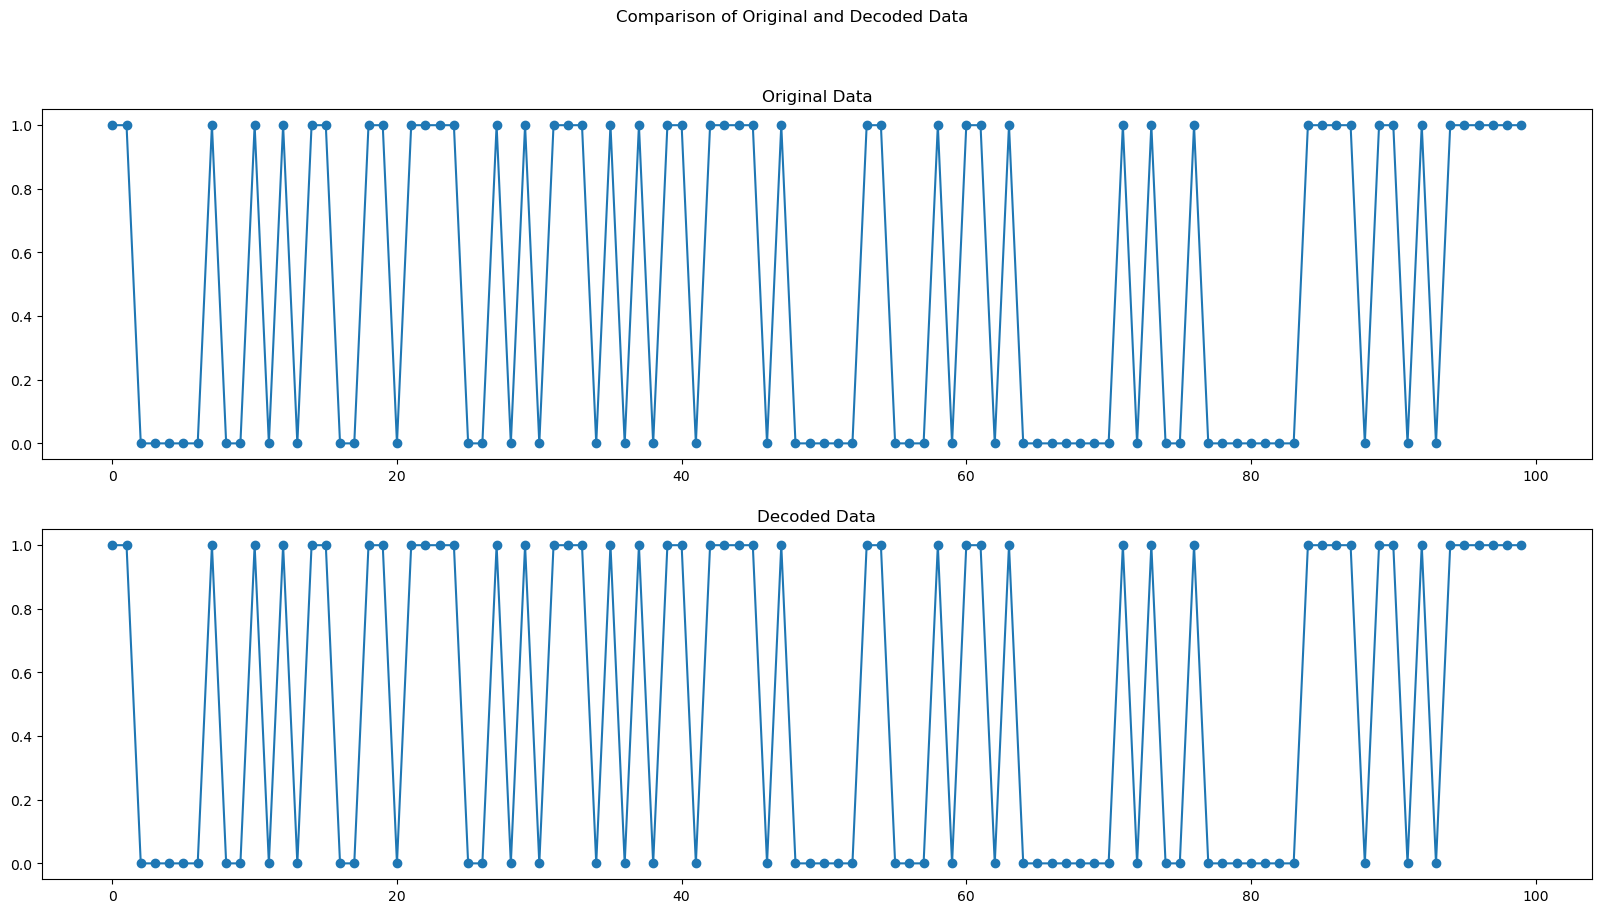

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import make_interp_spline


# Generate random binary data
data = np.random.randint(2, size=1000)

# Encode binary data into PAM4 signal
pam4_signal = []
for i in range(0, len(data), 2):
    if data[i] == 0 and data[i+1] == 0:
        pam4_signal.append(-3)
    elif data[i] == 0 and data[i+1] == 1:
        pam4_signal.append(-1)
    elif data[i] == 1 and data[i+1] == 0:
        pam4_signal.append(1)
    elif data[i] == 1 and data[i+1] == 1:
        pam4_signal.append(3)

# Add noise to the signal
noise_power = 0.1
pam4_signal_noisy = pam4_signal + np.random.normal(0, noise_power, len(pam4_signal))

# Decode PAM4 signal back to binary data
decoded_data = []
for i in range(len(pam4_signal_noisy)):
    if pam4_signal[i] < -2:
        decoded_data += [0, 0]
    elif pam4_signal[i] < 0:
        decoded_data += [0, 1]
    elif pam4_signal[i] < 2:
        decoded_data += [1, 0]
    else:
        decoded_data += [1, 1]

# Plot original and decoded data
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
fig.suptitle('Comparison of Original and Decoded Data')
axs[0].plot(data[0:100], 'o-')
axs[0].set_title('Original Data')
axs[1].plot(decoded_data[0:100], 'o-')
axs[1].set_title('Decoded Data')
plt.show()

In [13]:
pam4_signal_noisy

array([ 3.16521953, -2.85462194, -2.99368432, -0.86805234, -3.14722684,
        1.03871226,  0.88457597,  3.15321053, -3.03220355,  3.01095632,
       -0.92864377,  3.02437812,  1.05914901, -0.81142289, -0.86805102,
       -0.76859161,  2.98835765, -1.05254343, -0.95497434, -0.87454002,
        1.08206014,  2.93837058,  3.09481405, -0.93161509, -3.04243924,
       -2.97633555, -1.07657133,  0.92528878, -2.93095469,  1.17359108,
        2.92126642, -0.87753724, -2.87949531, -2.7483625 , -3.09235237,
       -1.08342906, -0.82496933, -2.93623813,  0.82316139, -2.82833666,
       -3.05988642, -2.99547278,  2.97875176,  3.10396821, -1.21378136,
        1.00418365,  0.95840322,  2.95531779,  3.03542812,  2.86752028,
        2.95264778,  3.05414263,  3.01363242, -2.87416409,  0.92862832,
       -1.18942268, -0.99291304,  0.73553175, -2.94944864, -2.90961748,
       -0.91648595,  0.96350523, -3.03369698,  1.06851066, -3.1165238 ,
       -3.16192633,  2.88387193, -1.05401012, -0.95037422,  3.03

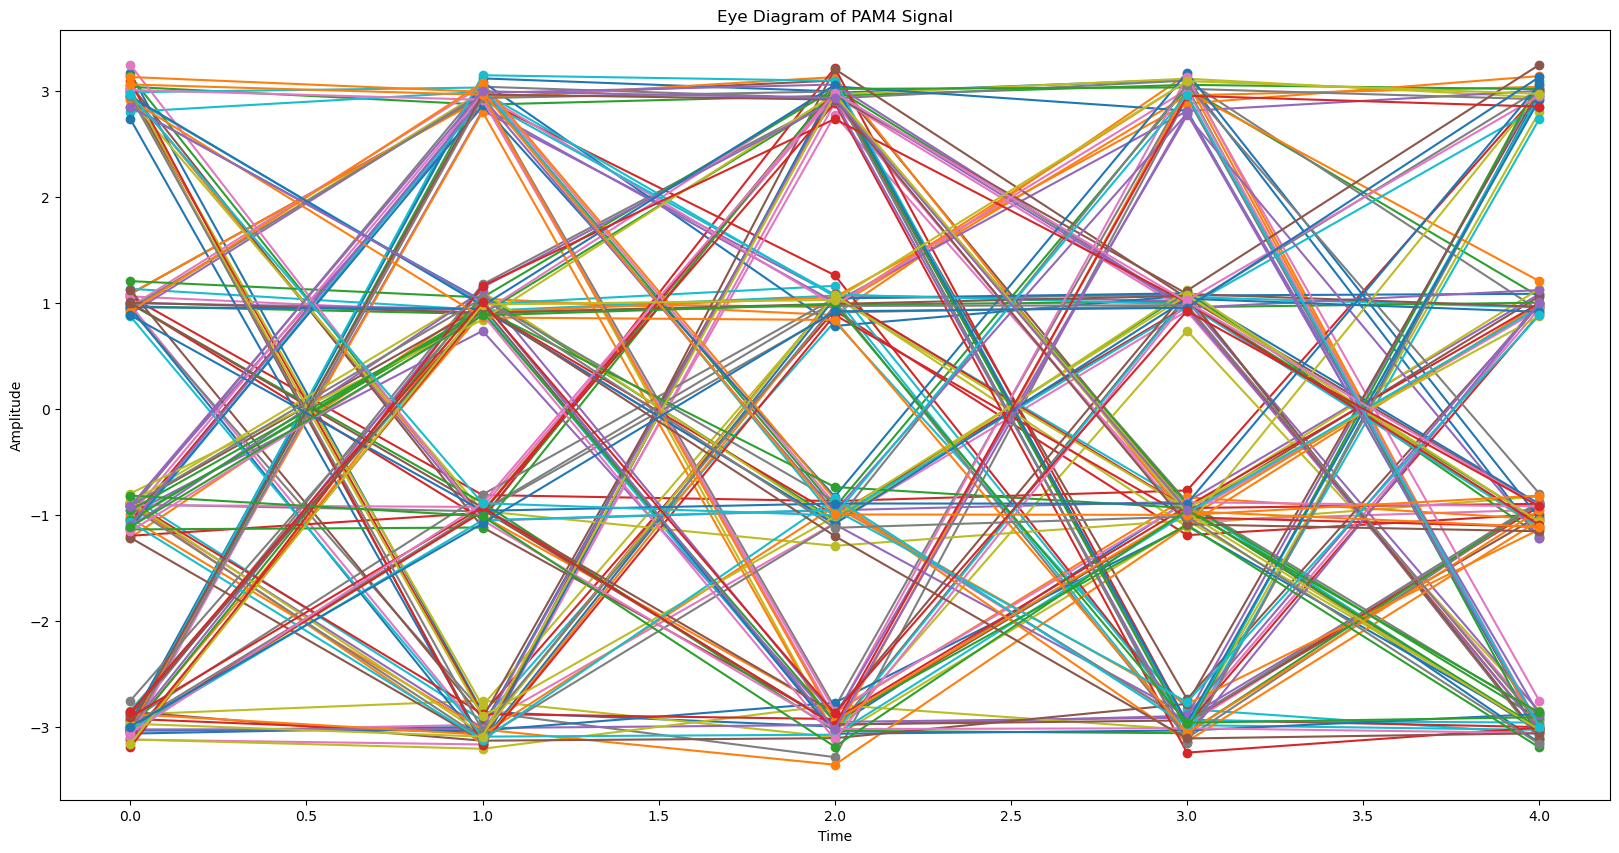

In [43]:
# Plot eye diagram of the signal
fig, ax = plt.subplots(figsize = (20, 10))
ax.set_title('Eye Diagram of PAM4 Signal')
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
for i in range(0, len(pam4_signal), 4):
    ax.plot(pam4_signal_noisy[i:i+5], 'o-')
plt.show()